In [3]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
MAY=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data5.txt',sep=',')
JUNE=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data6.txt',sep=',')
JULY=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data7.txt',sep=',')
AUGUST=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data8.txt',sep=',')

In [4]:
# 데이터 확인
print(MAY.columns)
print(JUNE.columns)
print(JULY.columns)
print(AUGUST.columns)

Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type',
       'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')
Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type',
       'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')
Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'X', 'Y', 'FranClass',
       'Type', 'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')
Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type',
       'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')


In [5]:
# 병합을 위해 7월데이터에 필요없는 변수 제거 
JULY.drop(JULY[['X','Y']],axis=1,inplace=True)

In [6]:
# 사용하지 않을 1열,2열 제거
group=[MAY,JUNE,JULY,AUGUST]
for i in range(len(group)):
    group[i].drop(group[i].columns[[0,1]],axis=1,inplace=True)

In [7]:
# 데이터프레임 병합
GROUP= pd.concat([MAY,JUNE,JULY,AUGUST])

In [8]:
GROUP

YM     SIDO SIGUNGU FranClass  Type Time  TotalSpent  DisSpent  \
0       202005  제주특별자치도     제주시        영세  일반한식  00시      363000     66500   
1       202005  제주특별자치도     제주시        영세  단란주점  00시     1180000         0   
2       202005  제주특별자치도     제주시       중소1   편의점  00시      157670      6850   
3       202005  제주특별자치도     제주시        영세   편의점  00시       46600         0   
4       202005  제주특별자치도     제주시        영세    주점  00시       66000         0   
...        ...      ...     ...       ...   ...  ...         ...       ...   
280080  202008  제주특별자치도     제주시        영세   편의점   x시       13700         0   
280081  202008  제주특별자치도     제주시        영세  일반한식   x시       56000         0   
280082  202008  제주특별자치도     제주시        영세  일반한식   x시       28000         0   
280083  202008  제주특별자치도     제주시       중소1  중국음식   x시       46000         0   
280084  202008  제주특별자치도     제주시        영세  서양음식   x시        9000         0   

        NumofSpent  NumofDisSpent      POINT_X       POINT_Y  
0               10              2  877005.9834  1.479766e+06  
1                3              0  877005.7447  1.479816e+06  
2               20              2  877056.6756  1.479616e+06  
3                2              0  877055.9593  1.479766e+06  
4                2              0  877055.4817  1.479866e+06  
...            ...            ...          ...           ...  
280080           2              0  950266.5976  1.502458e+06  
280081           1              0  950317.5379  1.502258e+06  
280082           1              0  950469.1585  1.501909e+06  
280083           3              0  950574.6388  1.500760e+06  
280084           1              0  950565.5176  1.502659e+06  

[1119429 rows x 12 columns]

In [9]:
## 저장
# GROUP.to_csv('C:/data/DACON/JEJU_GROUP2.csv',encoding='cp949')

### 전체사용금액 대비 재난지원금사용량

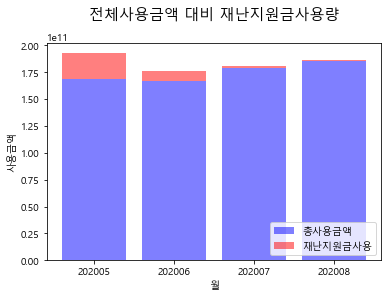

In [10]:
import numpy as np
GROUP_YM=GROUP.loc[:,['YM','TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].groupby(['YM'],as_index=False).sum()
label =['202005','202006','202007','202008']
N=len(GROUP_YM['YM'].unique())
index=np.arange(N)
alpha=0.5

p1=plt.bar(label,GROUP_YM['TotalSpent'],color='b',alpha=alpha)
p2=plt.bar(label,GROUP_YM['DisSpent'],color='r',alpha=alpha, bottom=GROUP_YM['TotalSpent'])
plt.title('전체사용금액 대비 재난지원금사용량\n', fontsize=15)
plt.ylabel('사용금액')
plt.xlabel('월')
plt.legend((p1[0],p2[0]),('총사용금액','재난지원금사용'),fontsize=10,loc=4)
plt.show()

In [11]:
GROUP.loc[:,['Type','TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=False).head(10)

TotalSpent    DisSpent  NumofSpent  NumofDisSpent
Type                                                        
일반한식     119782556296  6026486130     3301893         184580
슈퍼마켓      54684011769  5275406519     2347107         212527
농축협직영매장   21775667800  2609627232      593005          65243
편의점       39477932065  2022731930     4938511         226371
주유소       33650643540  1962843870      766793          41326
농협하나로클럽   10409721850  1356168646      214102          25365
스포츠레져용품   11590067771  1340087205      160174          16126
약국        13437995166  1056396320      665424          58987
서양음식      26851921875  1006835289     1851230          73269
농축수산품     14860792092   736762439      294000          16812

### 재난지원금 사용이 제한되는 업종 파악 

In [12]:
Type_sum=GROUP.groupby(['Type'],as_index=False).sum()
Type_sum[Type_sum['DisSpent']==0]['Type']

13             골동품점
14            골프경기장
15            골프연습장
17             공공요금
21              귀금속
32          기타대인서비스
35          기타비영리유통
55              노래방
60             단란주점
63            대학등록금
71              면세점
85            부동산분양
90     사무서비스(회원제형태)
95              상품권
98            성인용품점
102            손해보험
104           수입자동차
117        안마스포츠마사지
132            유흥주점
136           이륜차판매
139         인터넷Mall
140       인터넷종합Mall
159           조세서비스
169           중고자동차
181            칵테일바
198             항공사
Name: Type, dtype: object

## 재난지원금제도에 가장 영향이 큰 업종과 그렇지 않은 업종
- 일반한식 -> 슈퍼마켓 -> 농축협직영매장 -> 편의점 순으로 상위 업종 카테고리는 모두 식료품 관련 업종이라는 것을 알 수 있음
- 재난지원금 사용금액이 0인 업종은 제외하고 가장 낮은 금액에 업종을 파악함. 
- 기타광학품, 정보서비스, 카메라, 택시 업종들이 재난지원금제도에 가장 수혜를 못받고 있다는 것을 알 수 있음. 

In [13]:
not_benefit=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=True).head(10)
benefit=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=False).head(10)

Text(0.5, 1.0, '업종별 재난지원금 사용금액 하위 10개')

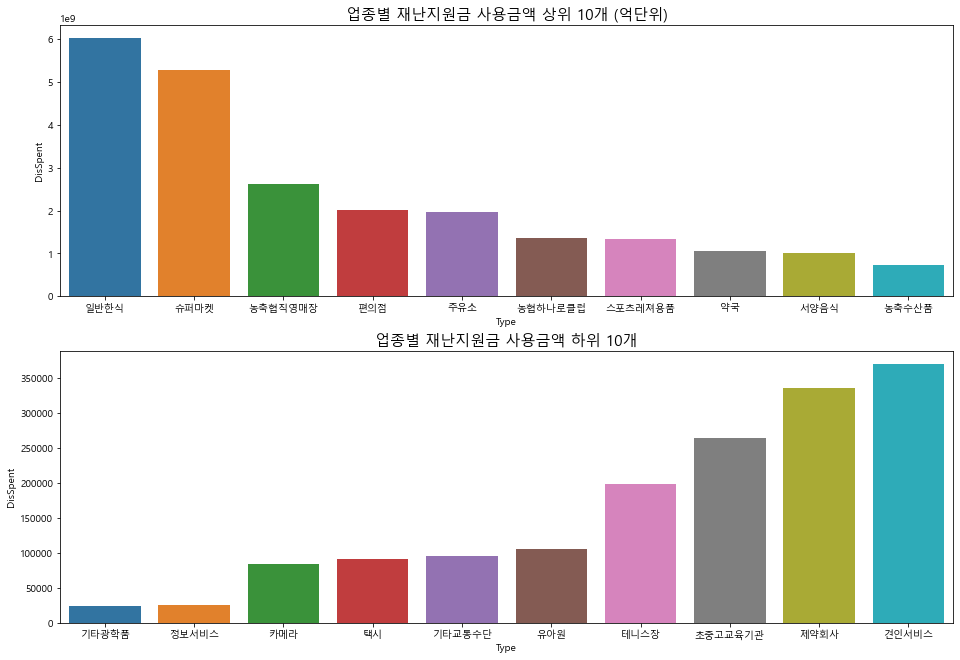

In [14]:
fig,ax = plt.subplots(2,1,figsize=(16,11))
sns.barplot(x=benefit.index,y=benefit['DisSpent'],ax=ax[0])
ax[0].set_title("업종별 재난지원금 사용금액 상위 10개 (억단위)",fontsize=15)
sns.barplot(x=not_benefit.index,y=not_benefit['DisSpent'],ax=ax[1])
ax[1].set_title('업종별 재난지원금 사용금액 하위 10개',fontsize=15)



## 평균으로 알아보는 재난지원금제도
- 총금액으로 결과 확인 시 관련업종의 수가 월등히 많아 이용건수/총금액이 높을 수 있다는 상황을 가정하여 평균을 내어 결과값 도출


In [15]:
benefit_avg=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).mean().sort_values(by='DisSpent',ascending=False).head(10)
not_benefit_avg=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).mean().sort_values(by='DisSpent',ascending=True).head(10)

Text(0.5, 1.0, '업종별 재난지원금 사용금액 하위 10개')

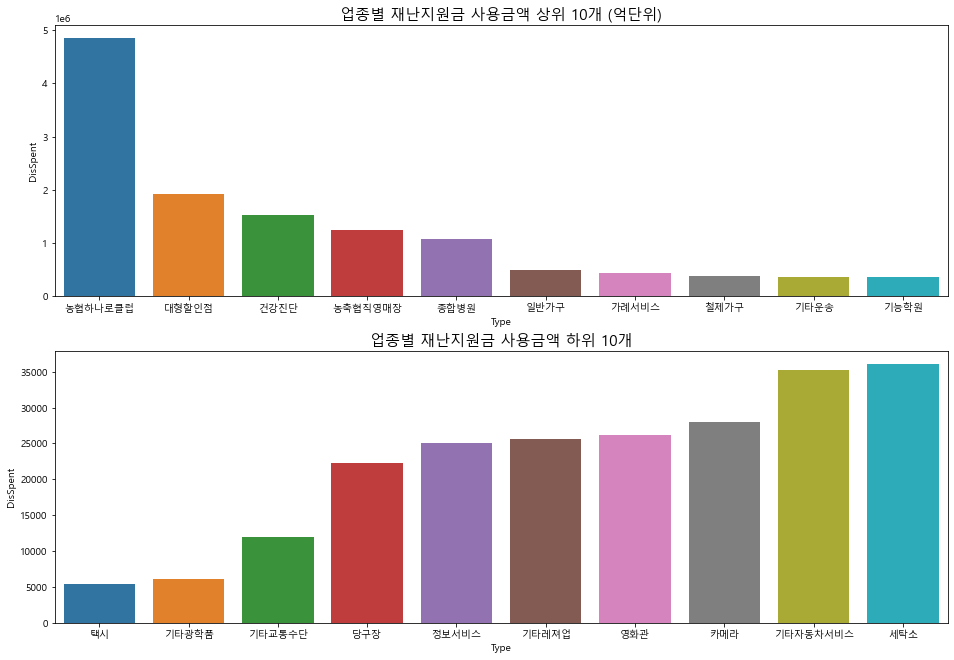

In [16]:
fig,ax = plt.subplots(2,1,figsize=(16,11))
sns.barplot(x=benefit_avg.index,y=benefit_avg['DisSpent'],ax=ax[0])
ax[0].set_title("업종별 재난지원금 사용금액 상위 10개 (억단위)",fontsize=15)
sns.barplot(x=not_benefit_avg.index,y=not_benefit_avg['DisSpent'],ax=ax[1])
ax[1].set_title('업종별 재난지원금 사용금액 하위 10개',fontsize=15)



## 업종별 재난지원금 월별 ( 5월~8월 ) 사용금액및 사용건수의 변화를 파악해봄
- 거의 모든 업종에서 5월 > 6월 > 7월 > 8월 사용금액이 점점 줄어드는 것을 알 수 있음
- 5월 1차 재난지원금이 지급 이후 재난지원금이 활발히 사용되었다고 볼 수 있다.
- 5월,6월달 재난지원금이 활발히 사용되었으며 상대적으로 7,8월은 적다는 것을 파악.

In [17]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf 
cf.go_offline(connected=True)

In [18]:
TEST=GROUP[GROUP['DisSpent']!=0].loc[:,['YM','Type','DisSpent','NumofDisSpent']]
@interact
def bar_plot(Type=sorted(list(TEST['Type'].unique()))):
    
    df=TEST[(TEST['Type']==Type)].pivot_table(index=['YM'],values=['DisSpent','NumofDisSpent'],aggfunc='sum')
    fig,ax = plt.subplots(2,1,figsize=(13,10))
    sns.barplot(x=df.index,y=df['DisSpent'],ax=ax[0])
    ax[0].set_title(Type+" 재난지원금 월별 사용금액 변화",fontsize=15)
    sns.barplot(x=df.index,y=df['NumofDisSpent'],ax=ax[1])
    ax[1].set_title(Type + ' 재난지원금 월별 사용횟수 변화',fontsize=15)

interactive(children=(Dropdown(description='Type', options=('1급호텔', '2급호텔', 'CATV', 'DVD음반테이프판매', 'LPG', '가례서비…

## 제주시 소상공인 비율 
- 영세소상공인 (연매출 3억미만)이 전체의 50%이상 이라는 것을 알 수 있음
- 영세 소상공인 업종 비율은 일반한식, 서양음식, 미용원, 스넥순으로 높은 것을 파악할 수 있다.

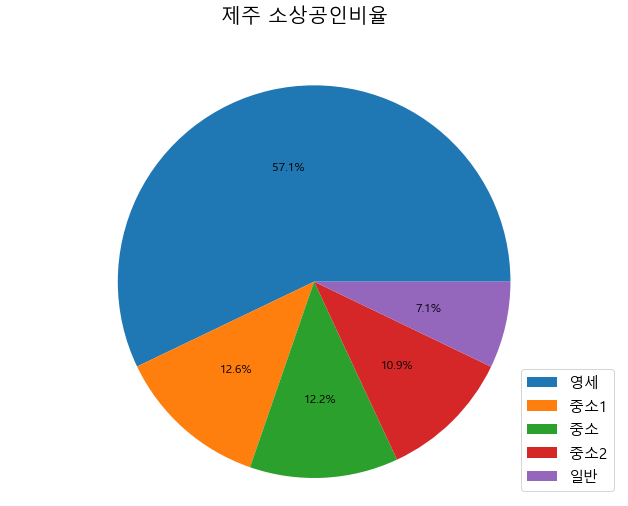

In [19]:
fig1, ax1=plt.subplots(figsize=(11,8))
fig1.suptitle('제주 소상공인비율', fontsize=20)
patches,texts,autotexts=ax1.pie(GROUP['FranClass'].value_counts(),autopct='%1.1f%%',textprops={'fontsize':12})
ax1.axis('equal')
ax1.legend(GROUP.FranClass.unique(), fontsize=15, loc=4)

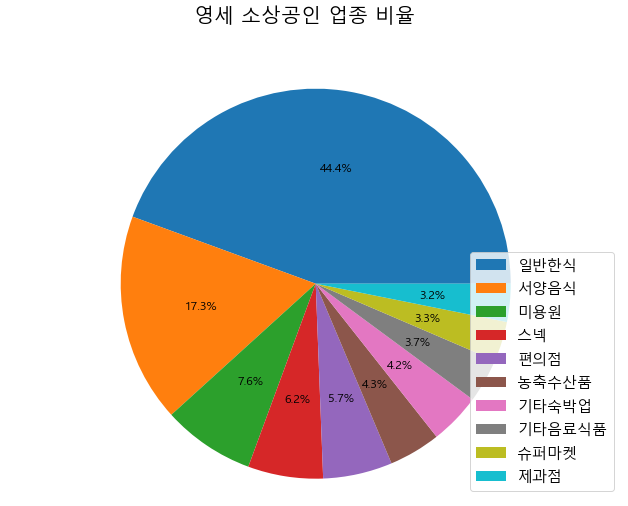

In [20]:
TEST=pd.DataFrame(GROUP[GROUP['FranClass']=='영세']['Type'].value_counts()).reset_index().head(10)
fig1, ax1=plt.subplots(figsize=(11,8))
fig1.suptitle('영세 소상공인 업종 비율', fontsize=20)
patches,texts,autotexts=ax1.pie(TEST['Type'],autopct='%1.1f%%',textprops={'fontsize':12})
ax1.axis('equal')
ax1.legend(TEST['index'], fontsize=15, loc=4)


## 시간별 분석 
- 새벽시간과 무승인거래 경우 재난지원금 거래 건수는 높지만 총 재난지원금 총금액이 비례하지 않으므로 대체적으로 사용금액이 작다는 것을 알 수 있음

In [21]:
# 시간컬럼 데이터 파악 
GROUP['Time'].unique()

array(['00시', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시',
       '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시',
       '18시', '19시', '20시', '21시', '22시', '23시', 'x시'], dtype=object)

In [22]:
# Time컬럼에 "시" 제거
GROUP['Time']=GROUP['Time'].str.replace('시','')

In [23]:
def time_change(x):
    if '02'<= x < '06':
        return '새벽'
    elif '06'<= x < '11':
        return '오전'
    elif '11'<= x < '15':
        return '점심'
    elif '15' <= x < '18':
        return '오후'
    elif '18' <= x < '22':
        return '저녁'
    elif '22' <= x < '02':
        return '심야'
    else: return '무승인거래'

In [24]:
GROUP.columns

Index(['YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type', 'Time', 'TotalSpent',
       'DisSpent', 'NumofSpent', 'NumofDisSpent', 'POINT_X', 'POINT_Y'],
      dtype='object')

In [25]:
GROUP['Time']=GROUP['Time'].apply(time_change)

<AxesSubplot:title={'center':'시간대별 재난지원금 이용건수'}, xlabel='Time', ylabel='NumofSpent'>

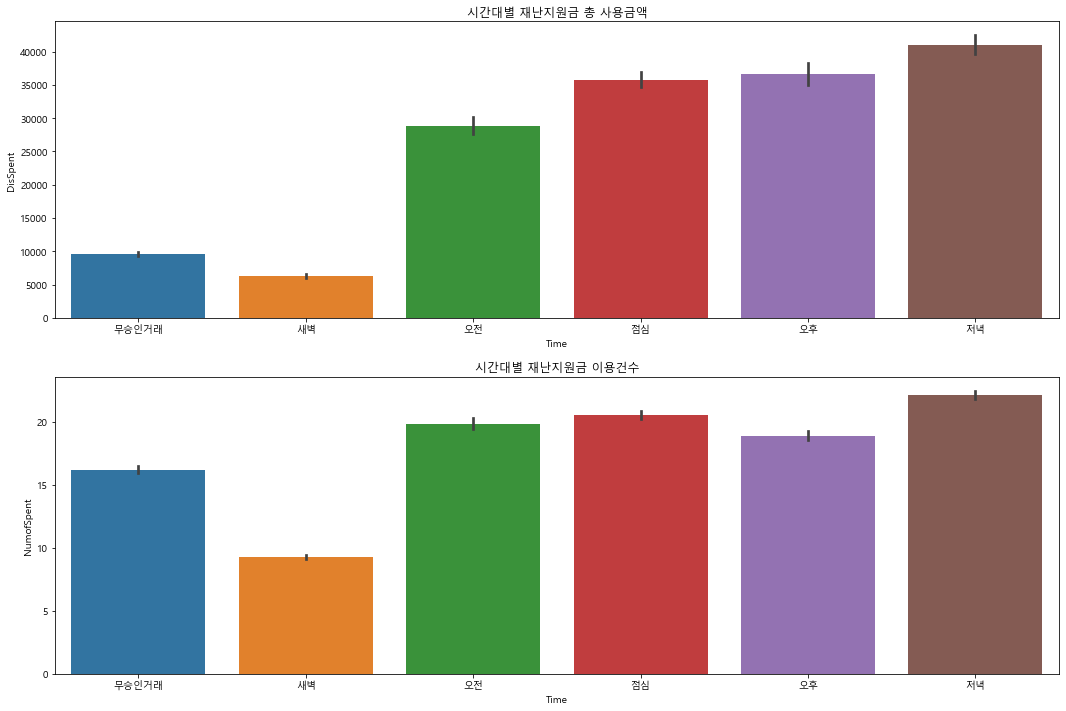

In [26]:
figure,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12)

ax1.set_title('시간대별 재난지원금 총 사용금액')
sns.barplot(data=GROUP,x='Time',y='DisSpent', ax=ax1)
ax2.set_title('시간대별 재난지원금 이용건수')
sns.barplot(data=GROUP,x='Time',y='NumofSpent',ax=ax2)

# 지도시각화    

In [27]:
# ITRF좌표계 -> WGS 좌표계
from pyproj import Proj, transform
proj_ITRF = Proj(init='epsg:5179')
proj_WGS84 = Proj(init='epsg:4326') 
GROUP['lon'],GROUP['lat']=transform(proj_ITRF,proj_WGS84,GROUP['POINT_X'],GROUP['POINT_Y'])

In [28]:
# folium 지도시각화
import folium
folium.__version__

'0.11.0'

In [54]:
# 제주도 지도 시각화 
m=folium.Map(location=[33.38773221915759, 126.54124720118492],zoom_start=11)

In [38]:
JEJUSI=GROUP[(GROUP['DisSpent']!=0)&(GROUP['SIGUNGU']=='제주시')].loc[:,['Type','Time','DisSpent','NumofDisSpent','lon','lat']].groupby(['lon','lat'],as_index=False).sum()
JEJUSI_AVG=JEJUSI[JEJUSI['DisSpent']>JEJUSI['DisSpent'].mean()]
JEJUSI_NONE=GROUP[(GROUP['DisSpent']==0)&(GROUP['SIGUNGU']=='제주시')].loc[:,['Type','Time','DisSpent','NumofDisSpent','lon','lat']].groupby(['lon','lat'],as_index=False).sum()
SEOGIPO=GROUP[(GROUP['DisSpent']!=0)&(GROUP['SIGUNGU']=='서귀포시')].loc[:,['Type','Time','DisSpent','NumofDisSpent','lon','lat']].groupby(['lon','lat'],as_index=False).sum()
SEOGIPO_AVG=SEOGIPO[SEOGIPO['DisSpent']>SEOGIPO['DisSpent'].mean()]
NON_SEOGIPO=GROUP[(GROUP['DisSpent']==0)&(GROUP['SIGUNGU']=='서귀포시')].loc[:,['Type','Time','DisSpent','NumofDisSpent','lon','lat']].groupby(['lon','lat'],as_index=False).sum()

## 서귀포시 재난지원금 사용 금액으로 지도시각화
- 빨강: 재난지원금이 사용되는 않은 위치
- 노랑: 재난지원금이 사용된 위치
- 초록: 재난지원금이 평균이상 사용된 위치

In [33]:
for i in range(len(NON_SEOGIPO)):
    folium.Circle(
        location=[NON_SEOGIPO.iloc[i][1],NON_SEOGIPO.iloc[i][0]],
        radius=10,
        color='red'
    ).add_to(m)
for i in range(len(SEOGIPO)):
    folium.Circle(
        location=[SEOGIPO.iloc[i][1],SEOGIPO.iloc[i][0]],
        radius=10,
        color='yellow'
    ).add_to(m)
for i in range(len(SEOGIPO_avg)):
    folium.Circle(
        location=[SEOGIPO_AVG.iloc[i][1],SEOGIPO_AVG.iloc[i][0]],
        radius=10,
        color='green'
    ).add_to(m)

In [35]:
m.save('서귀포시.html')

In [55]:
for i in range(len(NON_SEOGIPO)):
    folium.Circle(
        location=[JEJUSI_NONE.iloc[i][1],JEJUSI_NONE.iloc[i][0]],
        radius=10,
        color='red'
    ).add_to(m)
for i in range(len(SEOGIPO)):
    folium.Circle(
        location=[JEJUSI.iloc[i][1],JEJUSI.iloc[i][0]],
        radius=10,
        color='yellow'
    ).add_to(m)
for i in range(len(SEOGIPO_avg)):
    folium.Circle(
        location=[JEJUSI_AVG.iloc[i][1],JEJUSI_AVG.iloc[i][0]],
        radius=10,
        color='green'
    ).add_to(m)

In [56]:
m